In [5]:
from src.libs.lib import *
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_original = pd.read_csv("src/data/tabela_ocorrencias_dbpx_com_a_pontuação_academia.csv")

#2.6s

In [ ]:
# Substancias
# Comite realçado
# Descartar ocorrencias vinvculadas a atualizações justificadas.

In [10]:
df_original.sort_values("Pontuação", ascending=True).head()

,driver_id,Abandono do veículo,Aceleração brusca,Acidente,Agressão física,Agressão verbal,Apropriação indevida,Avaria,Banguela,Bebidas,Checklist Irregular,Cinto de segurança,Comportamento,Conduta Motorista,Consumo médio,Cuidado com equipamento/carga,Cumprimento de normas,Desistência de contratos,Desvio de rota,Dia agenciado,Distração ao volante,Distância Perigosa,Extravio de bens,Extravio de carga,Fadiga na direção,Frenagem brusca,Fumar ao volante,Imprudência,Não comparecimento em contrato,Não retorna contato com a PX,Não retorna contato com cliente,Outros,Parada não autorizada,Pontualidade,Prisão,Problema de saúde,Relacionadas ao Motorista,Relacionadas ao Transportador,Reprovado na Brasil Risk,Reprovado na GR,Risco de tombamento,Sinistro,Substâncias ilícitas,Uso do celular,Veículo,Dias decorridos,Pontuação,Ação
1931,61208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-311,-4761.0,Nenhuma
1979,63136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-282,-4622.0,Nenhuma
902,25937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2055.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-347,-4457.0,Nenhuma
2039,65341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-325,-4305.0,Nenhuma
2249,73728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1945.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-329,-4219.0,Nenhuma


In [11]:
df_original.shape

(6220, 48)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar dados
df = df_original.copy()
# 2. Resumo inicial
print("=== INFO DO DATAFRAME ===")
print(df.info(), "\n")

print("=== COLUNAS, TIPOS E AUSENTES ===")
cols_summary = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo de Dado': df.dtypes.astype(str),
    'Ausentes': df.isna().sum(),
    'Únicos': df.nunique()
})
print(cols_summary.to_string(index=False), "\n")

print(f"Linhas duplicadas: {df.duplicated().sum()}\n")

# 3. Amostra
print("=== AMOSTRA DE 10 LINHAS ===")
print(df.sample(10, random_state=42).to_string(index=False), "\n")

# 4. Estatísticas descritivas (numéricas)
numeric = df.select_dtypes(include=['int64', 'float64']).drop(columns=['driver_id'], errors='ignore')
print("=== DESCRIBE NUMÉRICO ===")
print(numeric.describe().T.to_string(), "\n")


In [9]:
df = df_original.groupby("Ação").mean().reset_index()  
df.head()

,Ação,driver_id,Abandono do veículo,Aceleração brusca,Acidente,Agressão física,Agressão verbal,Apropriação indevida,Avaria,Banguela,Bebidas,Checklist Irregular,Cinto de segurança,Comportamento,Conduta Motorista,Consumo médio,Cuidado com equipamento/carga,Cumprimento de normas,Desistência de contratos,Desvio de rota,Dia agenciado,Distração ao volante,Distância Perigosa,Extravio de bens,Extravio de carga,Fadiga na direção,Frenagem brusca,Fumar ao volante,Imprudência,Não comparecimento em contrato,Não retorna contato com a PX,Não retorna contato com cliente,Outros,Parada não autorizada,Pontualidade,Prisão,Problema de saúde,Relacionadas ao Motorista,Relacionadas ao Transportador,Reprovado na Brasil Risk,Reprovado na GR,Risco de tombamento,Sinistro,Substâncias ilícitas,Uso do celular,Veículo,Dias decorridos,Pontuação
0,Atualização,223795.000000,4.625000,0.000000,0.0,0.000000,0.000000,18.500000,0.000000,0.0,0.0,16.875000,0.0,0.0,0.0,0.000000,1.562500,4.625000,41.187500,2.312500,-60.875000,0.000000,0.000000,4.625000,0.000000,0.000000,0.00000,0.000000,0.000000,471.750000,60.937500,20.312500,0.0,0.000000,1.125000,9.250000,0.0,0.0,0.0,0.0,0.000000,0.000000,41.625000,9.250000,0.000000,0.0,-74.47500,512.337500
1,Comitê,131820.300000,0.000000,0.000000,0.0,0.000000,0.000000,12.333333,0.000000,0.0,11100.0,9.000000,0.0,0.0,0.0,0.000000,0.000000,21.583333,34.333333,3.083333,-377.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.50000,0.000000,0.000000,394.666667,52.083333,29.166667,0.0,2.083333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,30.833333,74.000000,3.083333,0.0,-144.30000,10867.950000
2,Nenhuma,138142.851036,0.425847,0.014798,0.0,0.121671,0.304176,0.121671,0.044393,0.0,0.0,0.651102,0.0,0.0,0.0,0.014798,0.411049,1.855475,6.767511,0.212923,-447.787734,0.143867,0.493259,0.060835,0.060835,0.246629,0.72509,0.243341,0.547517,20.866491,2.199112,1.068727,0.0,0.164420,0.059191,0.243341,0.0,0.0,0.0,0.0,0.246629,0.030418,10.281158,0.730023,4.106379,0.0,-142.09783,-984.210622


In [12]:
df.columns

Index(['Ação', 'driver_id', 'Abandono do veículo', 'Aceleração brusca',
       'Acidente', 'Agressão física', 'Agressão verbal',
       'Apropriação indevida', 'Avaria', 'Banguela', 'Bebidas',
       'Checklist Irregular', 'Cinto de segurança', 'Comportamento',
       'Conduta Motorista', 'Consumo médio', 'Cuidado com equipamento/carga',
       'Cumprimento de normas', 'Desistência de contratos', 'Desvio de rota',
       'Dia agenciado', 'Distração ao volante', 'Distância Perigosa',
       'Extravio de bens', 'Extravio de carga', 'Fadiga na direção',
       'Frenagem brusca', 'Fumar ao volante', 'Imprudência',
       'Não comparecimento em contrato', 'Não retorna contato com a PX',
       'Não retorna contato com cliente', 'Outros', 'Parada não autorizada',
       'Pontualidade', 'Prisão', 'Problema de saúde',
       'Relacionadas ao Motorista', 'Relacionadas ao Transportador',
       'Reprovado na Brasil Risk', 'Reprovado na GR', 'Risco de tombamento',
       'Sinistro', 'Substâncias 

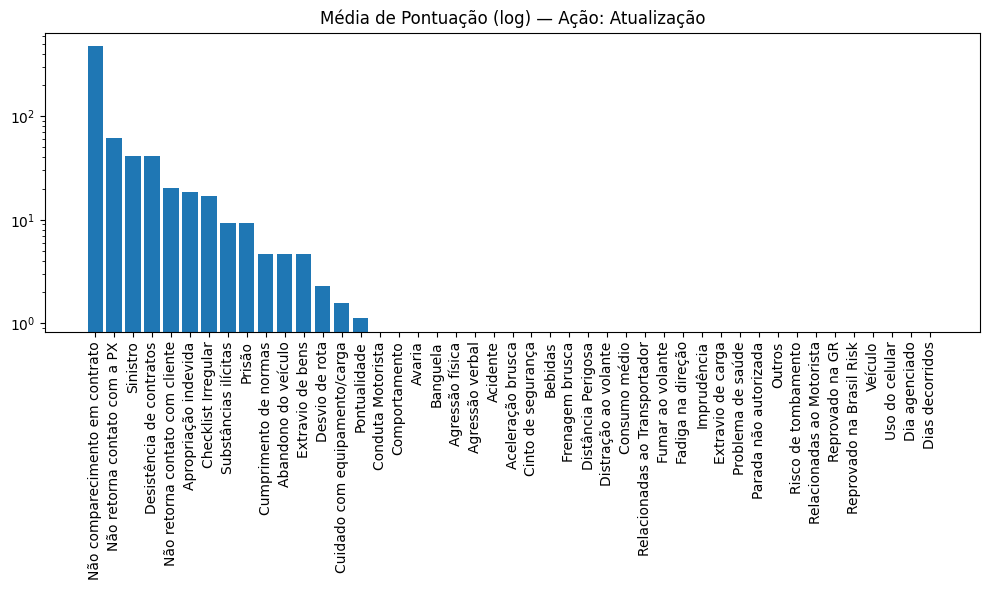

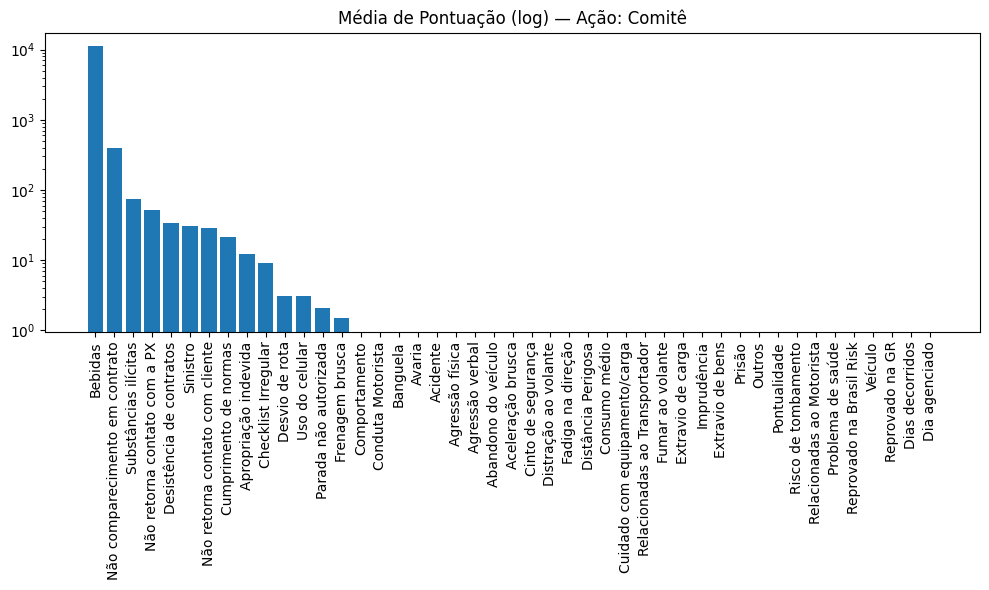

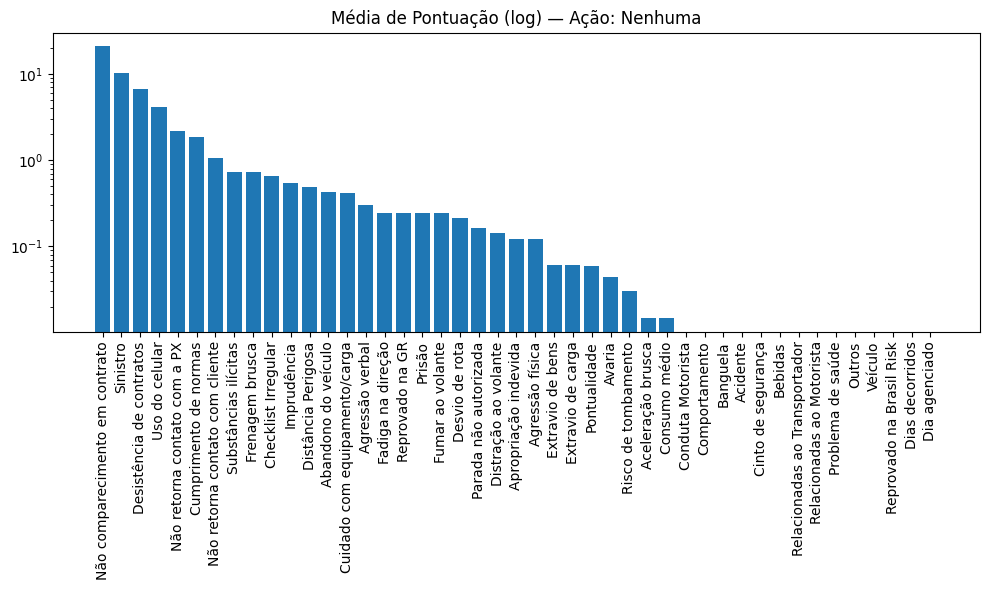

In [14]:
import matplotlib.pyplot as plt

# Calcular médias por Ação (agrupa e descarta colunas não numéricas automaticamente)
columns = ['Ação', 'Abandono do veículo', 'Aceleração brusca',
       'Acidente', 'Agressão física', 'Agressão verbal',
       'Apropriação indevida', 'Avaria', 'Banguela', 'Bebidas',
       'Checklist Irregular', 'Cinto de segurança', 'Comportamento',
       'Conduta Motorista', 'Consumo médio', 'Cuidado com equipamento/carga',
       'Cumprimento de normas', 'Desistência de contratos', 'Desvio de rota',
       'Dia agenciado', 'Distração ao volante', 'Distância Perigosa',
       'Extravio de bens', 'Extravio de carga', 'Fadiga na direção',
       'Frenagem brusca', 'Fumar ao volante', 'Imprudência',
       'Não comparecimento em contrato', 'Não retorna contato com a PX',
       'Não retorna contato com cliente', 'Outros', 'Parada não autorizada',
       'Pontualidade', 'Prisão', 'Problema de saúde',
       'Relacionadas ao Motorista', 'Relacionadas ao Transportador',
       'Reprovado na Brasil Risk', 'Reprovado na GR', 'Risco de tombamento',
       'Sinistro', 'Substâncias ilícitas', 'Uso do celular', 'Veículo',
       'Dias decorridos']



df_mean = df_original[columns].groupby('Ação').mean()

# Plotar em gráficos de barras separados, ordenados decrescentemente
for action, row in df_mean.iterrows():
    sorted_vals = row.sort_values(ascending=False)
    
    plt.figure(figsize=(10,6))
    plt.bar(sorted_vals.index, sorted_vals.values)
    plt.yscale('log')
    plt.xticks(rotation=90)
    plt.title(f'Média de Pontuação (log) — Ação: {action}')
    plt.tight_layout()
    plt.show()
